<a href="https://colab.research.google.com/github/joan-chep/WEEK_6_IP_CORE/blob/main/Moringa_Data_Science_Core_W6_Independent_Project_2022_02_Joan_Chepkwony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. (a) DEFINING THE QUESTION

1. (b) Defining the Metric for Success

1. (c) Understanding the Context

1. (d) Recording the Experimental Design

2. Importing Libraries

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import scipy as sp


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score 
from sklearn.metrics import mean_squared_error,  r2_score 
from sklearn import metrics


from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

import pandas_profiling as pp

!pip install pydataset
from pydataset import data 

     |████████████████████████████████| 15.9 MB 4.5 MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=f044942c249d026dc923bdfff7e0fa10d18b40f894ce2bedb15b03460864b5a3
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


3. Loading Our Dataset.

In [ ]:
fifa_ranking = pd.read_csv('/content/fifa_ranking.csv')
results = pd.read_csv('/content/results.csv')

4. Viewing Our Dataset

In [ ]:
# Checking for the first five values fifa_ranking dataset
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
# Checking the first five values of our results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
# Checking for the last five values fifa_ranking dataset
fifa_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
# Checking the last five values of our results dataset
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
# Checking for datatypes for the fifa_ranking dataset
fifa_ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [ ]:
# Checking for datatypes for the results dataset
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [ ]:
# Checking for the fifa ranking dataset info
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
# Checking for the results dataset info
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [ ]:
# Checking for the shape of the fifa ranking dataset

fifa_ranking.shape

(57793, 16)

In [ ]:
# Checking for the shape of the results dataset

results.shape

(40839, 9)

In [ ]:
# checking the columns in the fifa ranking dataset

fifa_ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [ ]:
# checking the columns in the results dataset

results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [ ]:
# Checking the number of unique values in the fifa ranking dataset columns 

for column in fifa_ranking.columns:
  print(fifa_ranking[column].nunique())
  print(column)
  # print(fifa_ranking[column].unique())
  print('\n')

209
rank


216
country_full


216
country_abrv


11114
total_points


1557
previous_points


121
rank_change


7419
cur_year_avg


7419
cur_year_avg_weighted


7473
last_year_avg


7001
last_year_avg_weighted


7575
two_year_ago_avg


6513
two_year_ago_weighted


7628
three_year_ago_avg


5849
three_year_ago_weighted


6
confederation


286
rank_date




In [ ]:
# Checking the number of unique values in the result dataset columns 

for column in results.columns:
  print(column)
  print(results[column].nunique())
  #print(results[column].unique())
  print('\n')

date
15115


home_team
309


away_team
306


home_score
26


away_score
22


tournament
109


city
1960


country
266


neutral
2




In [17]:
# Merging our datasets
football_match = fifa_ranking.merge(results, left_on=['rank_date','country_full'], right_on=['date','country'], how= 'inner')
football_match.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
1,35,Ecuador,ECU,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False
2,50,Zimbabwe,ZIM,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,Harare,Zimbabwe,False
3,59,Bolivia,BOL,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
4,65,Guinea,GUI,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False


In [18]:
# Checking for the shape
football_match.shape

(950, 25)

In [19]:
# Checking for the info
football_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 949
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     950 non-null    int64  
 1   country_full             950 non-null    object 
 2   country_abrv             950 non-null    object 
 3   total_points             950 non-null    float64
 4   previous_points          950 non-null    int64  
 5   rank_change              950 non-null    int64  
 6   cur_year_avg             950 non-null    float64
 7   cur_year_avg_weighted    950 non-null    float64
 8   last_year_avg            950 non-null    float64
 9   last_year_avg_weighted   950 non-null    float64
 10  two_year_ago_avg         950 non-null    float64
 11  two_year_ago_weighted    950 non-null    float64
 12  three_year_ago_avg       950 non-null    float64
 13  three_year_ago_weighted  950 non-null    float64
 14  confederation            9

5. Data Cleaning

In [20]:
# Checking for missing values in our dataset

football_match.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
dtype: int64

Our dataset has no missing values

In [21]:
# Checking for Duplicates
football_match.duplicated().any()

False

This shows there are no duplicates

In [29]:
# Drop Irrelevant columns
football_match.drop(['country_abrv','total_points','cur_year_avg','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted',
               'two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted','rank_date','country','confederation','city'], axis = 1, inplace = True)

In [30]:
# Checking for the first five columns
football_match.head()

,rank,country_full,previous_points,rank_change,date,home_team,away_team,home_score,away_score,tournament,neutral
0,8,Brazil,55,-5,1993-08-08,Brazil,Mexico,1,1,Friendly,False
1,35,Ecuador,23,30,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False
2,50,Zimbabwe,27,4,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,False
3,59,Bolivia,13,28,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False
4,65,Guinea,23,-2,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False


In [31]:
# Checking for the last five columns
football_match.tail()

,rank,country_full,previous_points,rank_change,date,home_team,away_team,home_score,away_score,tournament,neutral
945,12,England,1040,1,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,True
946,14,Uruguay,976,3,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,False
947,22,Iceland,930,0,2018-06-07,Iceland,Ghana,2,2,Friendly,False
948,26,Austria,841,0,2018-06-07,South Korea,Bolivia,0,0,Friendly,True
949,97,India,354,0,2018-06-07,India,New Zealand,1,2,Intercontinental Cup,False


In [33]:
# Checking for the info
football_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 949
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rank             950 non-null    int64 
 1   country_full     950 non-null    object
 2   previous_points  950 non-null    int64 
 3   rank_change      950 non-null    int64 
 4   date             950 non-null    object
 5   home_team        950 non-null    object
 6   away_team        950 non-null    object
 7   home_score       950 non-null    int64 
 8   away_score       950 non-null    int64 
 9   tournament       950 non-null    object
 10  neutral          950 non-null    bool  
dtypes: bool(1), int64(5), object(5)
memory usage: 82.6+ KB


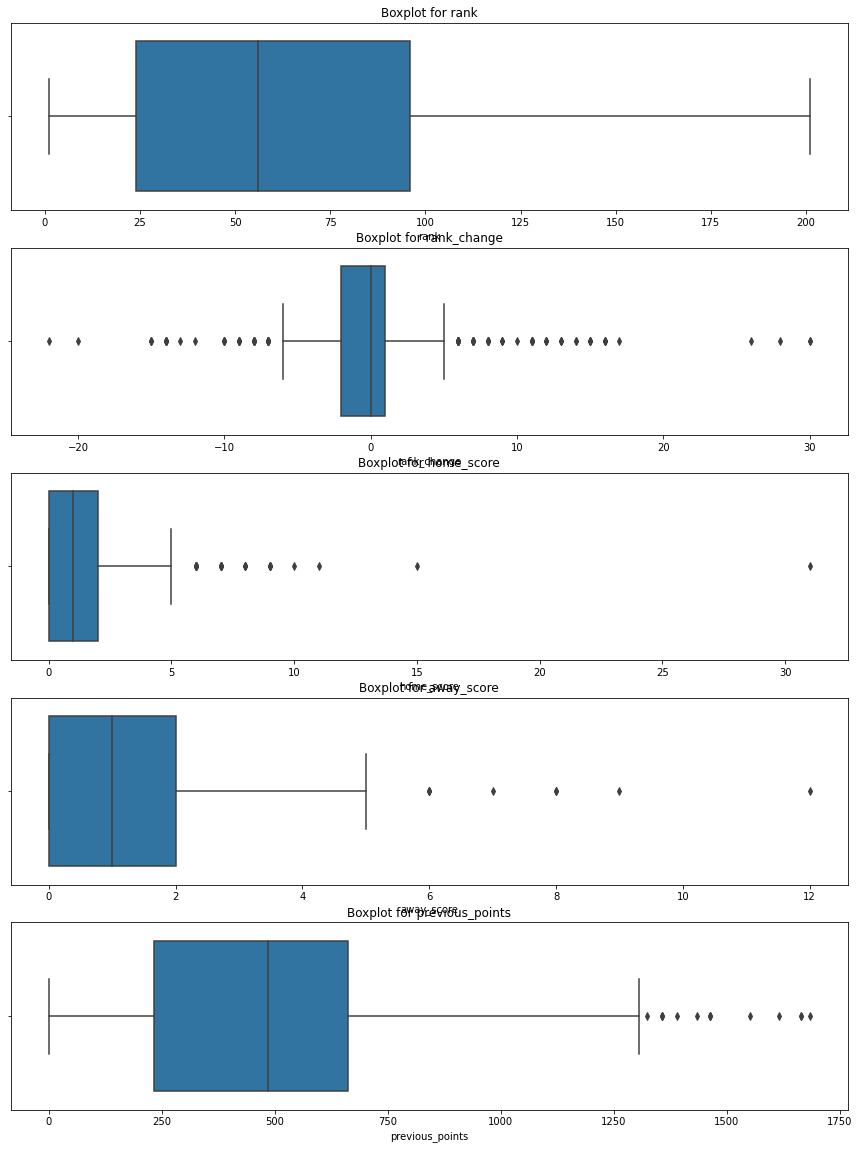

In [34]:
# Checking for any available Outliers
col_names = ['rank','rank_change','home_score','away_score','previous_points']
fig,ax = plt.subplots(len(col_names),figsize=(15,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(football_match[col_val], ax=ax[i], orient= 'v')
  #plt.subplots_adjust(top= 1.5,bottom=0.5,hspace=2)
  ax[i].set_title('Boxplot for {}'.format(col_val))
  ax[i].set_xlabel(col_val, fontsize=10)

There are outliers in our dataset

In [36]:
# Dropping the Outliers
q3 = football_match.quantile(0.75)
q1 = football_match.quantile(0.25)

iqr = q3 -q1

football_match_o = football_match[~((football_match < (q1 - 1.5 * iqr)) | (football_match > (q3 + 1.5 * iqr))).any(axis=1)]

In [38]:
print("The no. of records after removing outliers :",football_match_o.shape)
print("The no. of records before :",football_match.shape)

The no. of records after removing outliers : (703, 11)
The no. of records before : (950, 11)


In [39]:
# Import the clean Dataset
football_match_o.to_csv("football_match1.csv")

6. Exploratory Data Analysis

In [40]:
# Loading our Clean Dataset
df = pd.read_csv('football_match1.csv')

df.drop('Unnamed: 0', 1, inplace=True)
df.head()

,rank,country_full,previous_points,rank_change,date,home_team,away_team,home_score,away_score,tournament,neutral
0,8,Brazil,55,-5,1993-08-08,Brazil,Mexico,1,1,Friendly,False
1,50,Zimbabwe,27,4,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,False
2,65,Guinea,23,-2,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False
3,67,Paraguay,22,1,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False
4,44,Saudi Arabia,34,0,1993-09-23,Saudi Arabia,Costa Rica,1,2,Friendly,False


Univariate Analysis

In [43]:
categorical = ['country_full','date','home_team','away_team','tournament']

for i in categorical:
  print(football_match_o[i].value_counts())
  print('*****************************')

Estonia                   14
Portugal                  14
Greece                    13
England                   13
Hungary                   12
Saudi Arabia              12
Denmark                   12
Austria                   12
Norway                    11
Belgium                   11
Republic of Ireland       11
Slovakia                  11
Japan                     11
Israel                    11
Malta                     10
Oman                      10
Cyprus                    10
Ukraine                    9
Italy                      9
Luxembourg                 9
Chile                      9
Thailand                   8
Morocco                    8
Russia                     8
South Africa               8
Romania                    8
Poland                     8
Northern Ireland           8
Uruguay                    8
Czech Republic             8
Croatia                    7
Albania                    7
Spain                      7
Jordan                     7
Turkey        

Plotting Bar Charts

Text(0.5, 1.0, 'Home Team Countries')

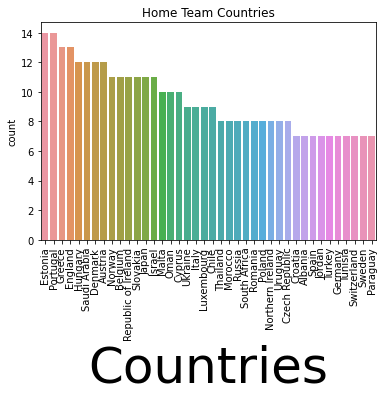

In [52]:
# Plotting the top 40 countries
sns.countplot(df['country_full'], order= df['country_full'].value_counts().iloc[:40].index)
plt.xticks(rotation = 90)
plt.xlabel('Countries', fontsize=50)
plt.title('Home Team Countries')

Text(0.5, 1.0, 'Away Team  Countries')

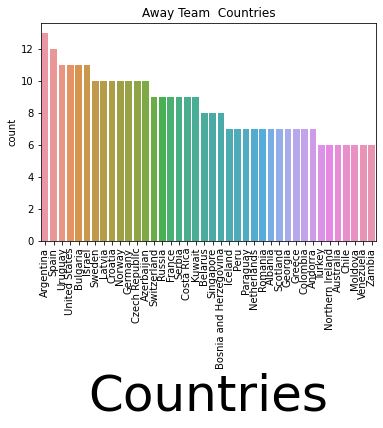

In [53]:
#  Plotting 40 of the Away team countries
sns.countplot(df['away_team'], order= df['away_team'].value_counts().iloc[:40].index)
plt.xticks(rotation = 90)
plt.xlabel('Countries', fontsize=50)
plt.title('Away Team  Countries')

Text(0.5, 1.0, 'Types of Tournments')

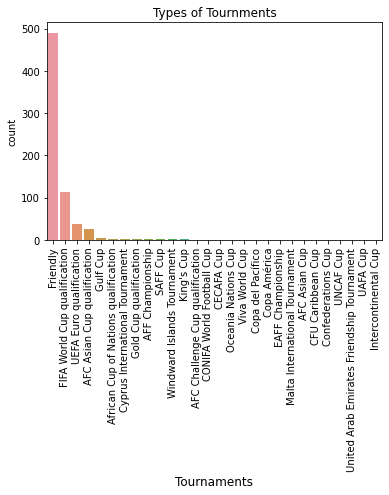

In [54]:
sns.countplot(df['tournament'], order= df['tournament'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Tournaments', fontsize=12)
plt.title('Types of Tournments')

In [55]:
#Numerical Variables
#Description
numerical = df[['rank','rank_change','home_score','away_score','previous_points']]

des = numerical.describe()
des.loc['Range'] = des.loc['max'] - des.loc['min']
des.loc['IQR'] = des.loc['75%'] - des.loc['25%'] 
des = des.append(numerical.reindex(des.columns, axis=1).agg(['skew', 'kurt']))
des

,rank,rank_change,home_score,away_score,previous_points
count,703.000000,703.000000,703.000000,703.000000,703.000000
mean,63.507824,-0.385491,1.431010,0.977240,466.270270
std,47.279910,2.206741,1.234825,1.067278,289.013862
min,1.000000,-6.000000,0.000000,0.000000,0.000000
25%,24.500000,-2.000000,0.000000,0.000000,248.000000
50%,53.000000,0.000000,1.000000,1.000000,501.000000
75%,93.000000,1.000000,2.000000,2.000000,658.500000
max,201.000000,5.000000,5.000000,5.000000,1306.000000
Range,200.000000,11.000000,5.000000,5.000000,1306.000000
IQR,68.500000,3.000000,2.000000,2.000000,410.500000


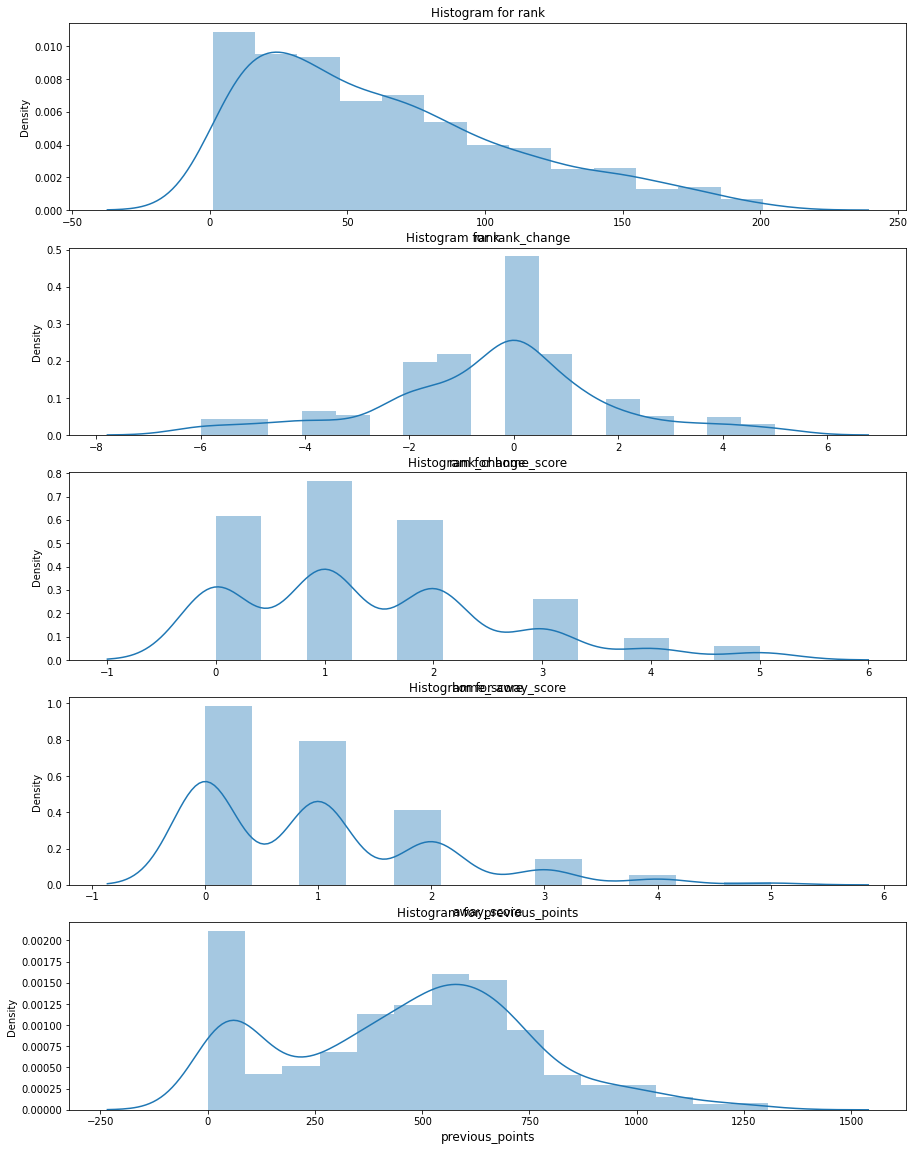

In [57]:
# Plotiing Histograms
col_name = ['rank','rank_change','home_score','away_score','previous_points']

fig,ax = plt.subplots(len(col_name),figsize=(15,20))

for i, col_val in enumerate(col_name):
  sns.distplot(df[col_val], ax=ax[i])
  ax[i].set_title('Histogram for {}'.format(col_val))
  ax[i].set_xlabel(col_val, fontsize=12)

Bivariate Analysis

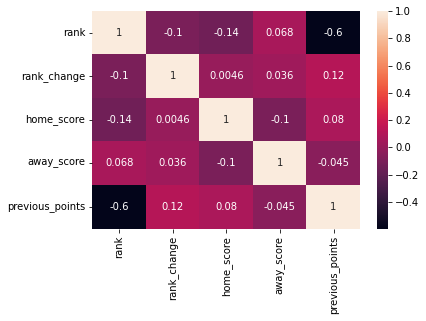

In [58]:
# Plotting a Heatmap

sns.heatmap(numerical.corr(), annot=True)

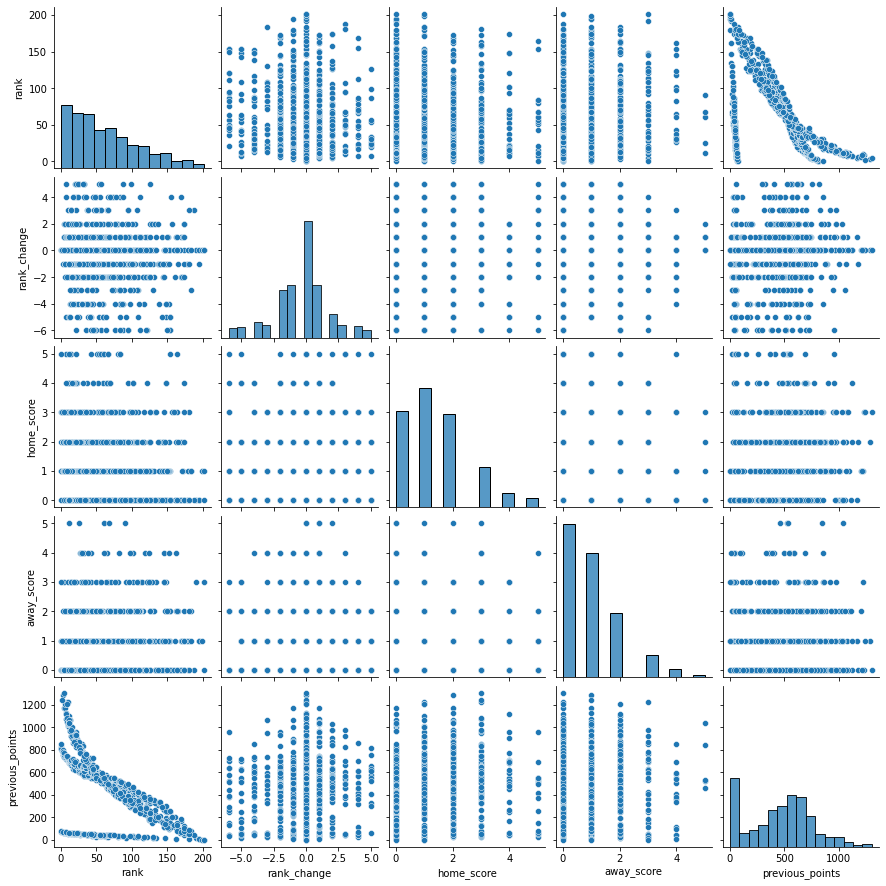

In [59]:
# Pair plot
sns.pairplot(numerical)

Feature Engineering

In [62]:
# Performing Feature Engineering 
tournament = pd.get_dummies(df['tournament'], drop_first=True)
tournament.head()

,AFC Asian Cup qualification,AFC Challenge Cup qualification,AFF Championship,African Cup of Nations qualification,CECAFA Cup,CFU Caribbean Cup,CONIFA World Football Cup,Confederations Cup,Copa América,Copa del Pacífico,Cyprus International Tournament,EAFF Championship,FIFA World Cup qualification,Friendly,Gold Cup qualification,Gulf Cup,Intercontinental Cup,King's Cup,Malta International Tournament,Oceania Nations Cup,SAFF Cup,UAFA Cup,UEFA Euro qualification,UNCAF Cup,United Arab Emirates Friendship Tournament,Viva World Cup,Windward Islands Tournament
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
df1 = df.drop(['tournament','country_full','previous_points','rank_change','date','home_team','away_team','neutral'],1)

independent_var = pd.concat([df1,tournament], axis=1)
independent_var.head()

,rank,home_score,away_score,AFC Asian Cup qualification,AFC Challenge Cup qualification,AFF Championship,African Cup of Nations qualification,CECAFA Cup,CFU Caribbean Cup,CONIFA World Football Cup,Confederations Cup,Copa América,Copa del Pacífico,Cyprus International Tournament,EAFF Championship,FIFA World Cup qualification,Friendly,Gold Cup qualification,Gulf Cup,Intercontinental Cup,King's Cup,Malta International Tournament,Oceania Nations Cup,SAFF Cup,UAFA Cup,UEFA Euro qualification,UNCAF Cup,United Arab Emirates Friendship Tournament,Viva World Cup,Windward Islands Tournament
0,8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,65,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,67,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,44,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


7. Implementing The Solution

1. Polynomial Approach

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Model 1
Predicting Home Scores

In [66]:
# Split the data into features and labels
X = independent_var['rank'].values.reshape(-1,1)
y = independent_var['home_score'].values

Text(0, 0.5, 'Home Score')

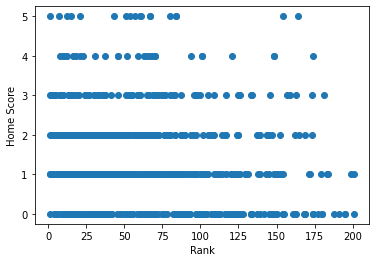

In [67]:
# Plotting scatter plot
plt.scatter(X,y)
plt.xlabel('Rank')
plt.ylabel('Home Score')

In [68]:
# Fitting the Independet Variables to a Polynomial 
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 1)
Xpoly = poly_reg.fit_transform(X)

# Split into Training and Test
X_train,X_test,y_train,y_test = train_test_split(Xpoly,y,test_size = 0.2)

LinReg = LinearRegression()
LinReg.fit( X_train, y_train)

# Make Predictions
y_pred = LinReg.predict(X_test)

# Residuals
residuals = np.subtract(y_pred,y_test)
# Calculate RMSE
from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE

1.2304294276874943

2. Cross Validation

In [69]:
from sklearn.model_selection import KFold
X = independent_var['rank'].values.reshape(-1,1)
y = independent_var['home_score'].values

folds = KFold(n_splits = 10)

print("We are using",str(folds.get_n_splits(X)),'folds')

RMSE = []
count = 1
for train_index,test_index in folds.split(X):
  print("Training Model", str(count))

  poly_reg = PolynomialFeatures(degree = 1)
  X_poly = poly_reg.fit_transform(X)

  X_train,X_test = X_poly[train_index],X_poly[test_index]
  y_train,y_test = y[train_index],y[test_index]

  LinReg = LinearRegression()
  LinReg.fit( X_train, y_train)

  # Make Predictions
  y_pred = LinReg.predict(X_test)

  # Calculate RMSE
  rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
  RMSE.append(rmse)

  print("Model",str(count),"has a RMSE of ", rmse)
  count = count + 1

We are using 10 folds
Training Model 1
Model 1 has a RMSE of  1.2563620448876585
Training Model 2
Model 2 has a RMSE of  1.3666036251486688
Training Model 3
Model 3 has a RMSE of  1.2114461826832166
Training Model 4
Model 4 has a RMSE of  1.1162354340957807
Training Model 5
Model 5 has a RMSE of  1.4169650878333044
Training Model 6
Model 6 has a RMSE of  0.9972224879186633
Training Model 7
Model 7 has a RMSE of  1.1623106728435175
Training Model 8
Model 8 has a RMSE of  1.1969327213903471
Training Model 9
Model 9 has a RMSE of  1.0915962791432257
Training Model 10
Model 10 has a RMSE of  1.3744674919020146


In [70]:
from sklearn.model_selection import LeaveOneOut

folds = LeaveOneOut()

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = []
count = 0 
for train_index, test_index in folds.split(X):
  poly_reg = PolynomialFeatures(degree = 1)
  X_poly = poly_reg.fit_transform(X)

  X_train,X_test = X_poly[train_index],X_poly[test_index]
  y_train,y_test = y[train_index],y[test_index]

  LinReg = LinearRegression()
  LinReg.fit( X_train, y_train)

  # Make Predictions
  y_pred = LinReg.predict(X_test)

  # Calculate RMSE
  rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
  RMSE.append(rmse)

  count = count + 1
print("We have trained",str(count)," models with the mean of RMSE as ",np.mean(RMSE) )

we are using 703 folds
We have trained 703  models with the mean of RMSE as  0.9940351146902844


3. Heteroscedasticity using Bartlett’s Test

In [71]:

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

nan
the variances are homogeneous!


MultiLinear Regression for Tournament Type

In [72]:
# Predicting Home Score using the tournament type
X = independent_var.iloc[:,3:].values
y = independent_var['home_score'].values


# Split the Data  to train and test
T_train,T_test,h_train,h_test = train_test_split(X,y, test_size=0.3)

# Train the Data
LinReg.fit(T_train,h_train)

# Make Predictions
h_pred = LinReg.predict(T_test)

#Residuals
res = np.subtract(h_pred, h_test)
# Evaluate the Model
RMSE = np.sqrt(metrics.mean_squared_error(h_test,h_pred))
RMSE

1.2297274723019767

Cross Validation

In [73]:
X = independent_var.iloc[:,3:].values
y = independent_var['home_score'].values

folds = KFold(n_splits = 15)

print("We are using",str(folds.get_n_splits(X)),'folds')

RMSE = []
count = 1
for train_index,test_index in folds.split(X):
  print("Training Model", str(count))

  T_train,T_test = X[train_index],X[test_index]
  h_train,h_test = y[train_index],y[test_index]

  # Train the Data
  LinReg.fit(T_train,h_train)

  # Make Predictions
  h_pred = LinReg.predict(T_test)


  # Calculate RMSE
  rmse = np.sqrt(metrics.mean_squared_error(h_test,h_pred))
  RMSE.append(rmse)

  print("Model",str(count),"has a RMSE of ", rmse)
  count = count + 1

print("******************************")
print("The mean RMSE score is",np.mean(RMSE))

We are using 15 folds
Training Model 1
Model 1 has a RMSE of  1.2732595352035572
Training Model 2
Model 2 has a RMSE of  1.4677573635034167
Training Model 3
Model 3 has a RMSE of  1.285787554650167
Training Model 4
Model 4 has a RMSE of  1.2210446559045467
Training Model 5
Model 5 has a RMSE of  1.3912967970864836
Training Model 6
Model 6 has a RMSE of  1.0227234794959854
Training Model 7
Model 7 has a RMSE of  1.2882213896281447
Training Model 8
Model 8 has a RMSE of  1.6078096559440718
Training Model 9
Model 9 has a RMSE of  1.0023465288709885
Training Model 10
Model 10 has a RMSE of  5124289637538.905
Training Model 11
Model 11 has a RMSE of  1.2133250550447388
Training Model 12
Model 12 has a RMSE of  1.3129486178623748
Training Model 13
Model 13 has a RMSE of  1.0788372836493423
Training Model 14
Model 14 has a RMSE of  1.1154458223893906
Training Model 15
Model 15 has a RMSE of  1.5590882206181924
******************************
The mean RMSE score is 341619309170.44965


In [74]:
# Checking for the best RMSE score our model can give

folds = LeaveOneOut()

print("We are using",str(folds.get_n_splits(X)),'folds')

RMSE = []
count = 0
for train_index,test_index in folds.split(X):
  
  T_train,T_test = X[train_index],X[test_index]
  h_train,h_test = y[train_index],y[test_index]

  # Train the Data
  LinReg.fit(T_train,h_train)

  # Make Predictions
  h_pred = LinReg.predict(T_test)


  # Calculate RMSE
  rmse = np.sqrt(metrics.mean_squared_error(h_test,h_pred))
  RMSE.append(rmse)

  count = count + 1

print("We have trained",str(count),"models with a RMSE of ", np.mean(RMSE))

We are using 703 folds
We have trained 703 models with a RMSE of  1.0272323256201357


 Heteroscedasticity

In [75]:
 test_result, p_value = sp.stats.bartlett(h_pred, res)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(h_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

nan
the variances are homogeneous!


Model 2
Predicting The Away Score

In [76]:
# Features and Labels
X = independent_var['rank'].values.reshape(-1,1)
y = independent_var['away_score'].values

In [77]:
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)

X_train,X_test = X_poly[train_index],X_poly[test_index]
y_train,y_test = y[train_index],y[test_index]

#Fit to a Linear Regression
LinReg.fit(X_train,y_train)

#Make Predictions
y_pred = LinReg.predict(X_test)

#Residuals
res1 = np.subtract(y_pred,y_test)

#Calculate RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

0.9045852662991987

Cross Validation

In [78]:
folds = KFold(n_splits=20)

print("We are using",str(folds.get_n_splits(X)),'folds')

RMSE = []
count = 1
for train_index,test_index in folds.split(X):
  print("Training Model",str(count))

  poly_reg = PolynomialFeatures(degree = 5)
  X_poly = poly_reg.fit_transform(X)

  X_train,X_test = X_poly[train_index],X_poly[test_index]
  y_train,y_test = y[train_index],y[test_index]

  #Fit to a Linear Regression
  LinReg.fit(X_train,y_train)

  #Make Predictions
  y_pred = LinReg.predict(X_test)

  #RMSE
  rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
  RMSE.append(rmse)

  print("Model",str(count),'has a RMSE of',rmse)
  count = count+1

We are using 20 folds
Training Model 1
Model 1 has a RMSE of 1.2103210458304337
Training Model 2
Model 2 has a RMSE of 1.212991699891713
Training Model 3
Model 3 has a RMSE of 0.8949466982058016
Training Model 4
Model 4 has a RMSE of 1.0653520148507338
Training Model 5
Model 5 has a RMSE of 0.8090745989449026
Training Model 6
Model 6 has a RMSE of 1.2739248847947937
Training Model 7
Model 7 has a RMSE of 1.3088950570799363
Training Model 8
Model 8 has a RMSE of 1.160144171409613
Training Model 9
Model 9 has a RMSE of 1.0161361606709325
Training Model 10
Model 10 has a RMSE of 1.133216239820547
Training Model 11
Model 11 has a RMSE of 0.8960148842946609
Training Model 12
Model 12 has a RMSE of 1.1086485961700554
Training Model 13
Model 13 has a RMSE of 1.4511528594269965
Training Model 14
Model 14 has a RMSE of 0.8704114235721386
Training Model 15
Model 15 has a RMSE of 0.9226041065184996
Training Model 16
Model 16 has a RMSE of 0.8933603785050676
Training Model 17
Model 17 has a RMSE o

In [79]:
folds = LeaveOneOut()

print("We are using",str(folds.get_n_splits(X)),'folds')

RMSE = []
count = 0
for train_index,test_index in folds.split(X):
  poly_reg = PolynomialFeatures(degree = 3)
  X_poly = poly_reg.fit_transform(X)

  X_train,X_test = X_poly[train_index],X_poly[test_index]
  y_train,y_test = y[train_index],y[test_index]

  #Fit to a Linear Regression
  LinReg.fit(X_train,y_train)

  #Make Predictions
  y_pred = LinReg.predict(X_test)

  #RMSE
  rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
  RMSE.append(rmse)

  count = count+1

print("We are using",str(count),' models with RMSE of',np.mean(RMSE))

We are using 703 folds
We are using 703  models with RMSE of 0.8179101186892772


 Heteroscedasticity using Bartlett’s Test

In [80]:
test_result, p_value = sp.stats.bartlett(y_pred, res1)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

nan
the variances are homogeneous!


MultiLinear Regression using Tournament

In [81]:
X = independent_var.iloc[:,3:].values
y = independent_var['away_score'].values

#Split the data to train and test
T_Train,T_Test,a_train,a_test = train_test_split(X,y,test_size=0.2)

#Train the data
LinReg.fit(T_Train,a_train)

#Make prediction
a_pred = LinReg.predict(T_Test)

#residuals
res3 = np.subtract(a_pred, a_test)

#Calculate the RMSE
print("The RMSE is : ",np.sqrt(metrics.mean_squared_error(a_test,a_pred)))

The RMSE is :  1.1012759103422491


In [82]:
X = independent_var.iloc[:,3:].values
y = independent_var['away_score'].values

folds = KFold(n_splits= 15)

print("We are using",str(folds.get_n_splits(X)),'folds')

RMSE = []
count = 1

for train,test in folds.split(X):
  print('Training Model', str(count))

  T_Train,T_Test = X[train],X[test]
  a_train,a_test = y[train],y[test]

  #Train the data
  LinReg.fit(T_Train,a_train)

  #Make prediction
  a_pred = LinReg.predict(T_Test)

  #Calculate the RMSE
  rmse = np.sqrt(metrics.mean_squared_error(a_test,a_pred))
  RMSE.append(rmse)

  print("Model has RMSE of", rmse)
  count += 1
print('***************************')
print("The mean RMSE is:",np.mean(RMSE))

We are using 15 folds
Training Model 1
Model has RMSE of 1.200711094321694
Training Model 2
Model has RMSE of 1.2004968575267303
Training Model 3
Model has RMSE of 1.037213355117564
Training Model 4
Model has RMSE of 0.7630791434948789
Training Model 5
Model has RMSE of 1.2026065174833274
Training Model 6
Model has RMSE of 1.4352175763597923
Training Model 7
Model has RMSE of 1.0408370010339987
Training Model 8
Model has RMSE of 1.0766863859926228
Training Model 9
Model has RMSE of 1.0574258411092827
Training Model 10
Model has RMSE of 3458902764916.6523
Training Model 11
Model has RMSE of 1.1961014943833885
Training Model 12
Model has RMSE of 0.893834350300483
Training Model 13
Model has RMSE of 0.8498735503117488
Training Model 14
Model has RMSE of 1.1674723029497254
Training Model 15
Model has RMSE of 0.9387224703428539
***************************
The mean RMSE is: 230593517662.11423


In [83]:
#Checking for the lowest RMSE score for the model

folds = LeaveOneOut()

print("We are using",str(folds.get_n_splits(X)),'folds')

RMSE = []
count = 0

for train,test in folds.split(X):
  T_Train,T_Test = X[train],X[test]
  a_train,a_test = y[train],y[test]

  #Train the data
  LinReg.fit(T_Train,a_train)

  #Make prediction
  a_pred = LinReg.predict(T_Test)

  #Calculate the RMSE
  rmse = np.sqrt(metrics.mean_squared_error(a_test,a_pred))
  RMSE.append(rmse)

  count += 1

print(str(count),"Models have been trained with a mean RMSE of", np.mean(RMSE))

We are using 703 folds
703 Models have been trained with a mean RMSE of 0.8222779296421733


Heteroscedasticity using Bartlett’s Test

In [84]:

test_result, p_value = sp.stats.bartlett(a_pred, res3)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(a_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

nan
the variances are homogeneous!


2. Logistic Approach

Feature Engineering

In [85]:
def status(home_score,away_score):
  if home_score > away_score:
      return 'Win'
  elif home_score < away_score:
      return 'Lose'
  else:
      return 'Draw'

In [89]:
# Variables to Use
ind_var = df[['rank','home_score','away_score','tournament','home_status']]

In [90]:
tour = pd.get_dummies(ind_var['tournament'], drop_first= True)
tour.head()

,AFC Asian Cup qualification,AFC Challenge Cup qualification,AFF Championship,African Cup of Nations qualification,CECAFA Cup,CFU Caribbean Cup,CONIFA World Football Cup,Confederations Cup,Copa América,Copa del Pacífico,Cyprus International Tournament,EAFF Championship,FIFA World Cup qualification,Friendly,Gold Cup qualification,Gulf Cup,Intercontinental Cup,King's Cup,Malta International Tournament,Oceania Nations Cup,SAFF Cup,UAFA Cup,UEFA Euro qualification,UNCAF Cup,United Arab Emirates Friendship Tournament,Viva World Cup,Windward Islands Tournament
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
# Label Encoded the status

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

ind_var['home_status'] = label_encoder.fit_transform(ind_var['home_status'])
ind_var['home_status']

0      0
1      2
2      2
3      1
4      1
      ..
698    2
699    1
700    2
701    0
702    1
Name: home_status, Length: 703, dtype: int64

In [94]:
#Feautures and Labels

X = ind_var.drop(['home_status','away_score'],1).values
y = ind_var['home_status'].values

#Split the Data to Train and Test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

#Train the model
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

#Make a prediction
y_pred = LogReg.predict(X_test)
#Evaluate the model
from sklearn.metrics import confusion_matrix,accuracy_score

confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

ValueError: ignored

Optimize the Logistic Regression using HyperParameter Tuning

In [95]:
X = ind_var.drop(['home_status','away_score'],1).values
y = ind_var['home_status'].values


#Split the Data to Train and Test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

# Scaling the Data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

ValueError: ignored

In [96]:
#Train the Data and Cross Validation
LogReg = LogisticRegression()

from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=LogReg, X=X_train, y=y_train, cv=5)

print(all_accuracies)
print(all_accuracies.mean())

[nan nan nan nan nan]
nan


In [97]:
# Hyperparameters

penalty = ['l1','l2']
C = np.logspace(0,8,20)

hyperparameters  = dict(C=C, penalty = penalty)

In [ ]:
#Use the Grid Search for the best combination of Hyperparameters
#from sklearn.model_selection import GridSearchCV
#clf = GridSearchCV(LogReg, hyperparameters, cv =10, verbose=0)

In [98]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(LogReg, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

The accuracy does not increase significantly

Challenging The Solution